# 使用梯度上升求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size = 100)

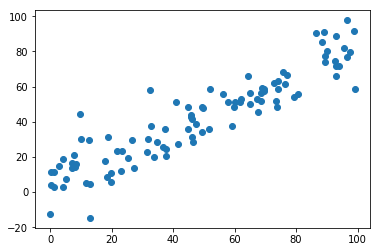

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## demean

In [6]:
# 向量化运算
def demean(X):
    return X - np.mean(X, axis=0) 

In [7]:
X_demean = demean(X)

In [10]:
# 查看两个feature上的均值
print(np.mean(X_demean[:,0]))
print(np.mean(X_demean[:,1]))

4.476419235288631e-15
-9.734435479913373e-15


## 梯度上升

In [27]:
# 对于给定的 w,X 求目标函数的值
def f(w, X):
    return np.sum((X.dot(w)) ** 2) / len(X)

In [28]:
# 利用推导的公式求解梯度
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2 /len(X)

In [36]:
# 验证梯度是否正确 定义法求梯度
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X))/(2 * epsilon)
    return res

In [30]:
# 把w变成单位向量
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    cur_iter = 0
    w = direction(initial_w)
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient # 不能用+= 否则 last_w的值也会改变
        w = direction(w) # 注意1：每次求一个单位向量
        if(abs(f(w, X) - f(w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [31]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能从0向量开始
initial_w

array([0.64705774, 0.10828685])

In [32]:
eta = 0.01

In [33]:
# 注意3：不能用StandardScaler标准化

In [37]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.79763507, 0.60314037])

In [35]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.79763507, 0.60314037])

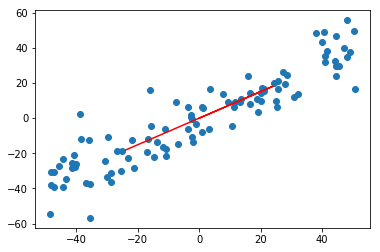

In [40]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30, w[0]*-30], [0, w[1]*30, w[1]*-30], color='red')
plt.show()

In [45]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.

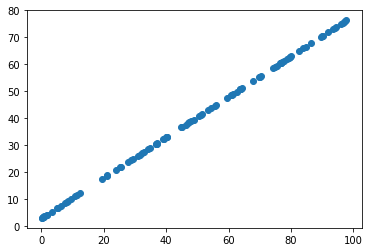

In [46]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [47]:
X2_demean = demean(X2)

In [48]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

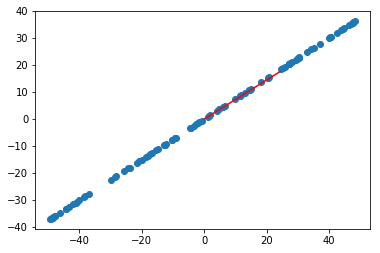

In [50]:
plt.scatter(X2_demean[:, 0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0,w2[1]*30], color='red')
plt.show()